<a href="https://colab.research.google.com/github/nbignu/Clinoforma/blob/master/Clinoforma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indique el material del que desea obtener densidad ('shale', 'sandstone'): 
shale
Introduzca cociente de velocidades, son 4: 
0.2
0.4
0.6
.8
 
Introduzca la profundidad en metros (z): 
5000
Introduzca la distancia en metros (x): 
8000
Todas las variables estan en magnitudes del sistema internacional
 


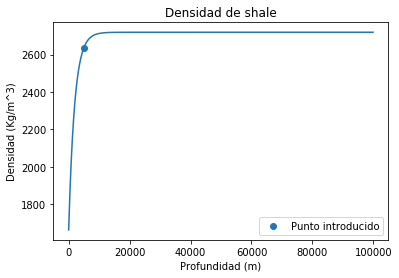

densidad = 2637.3583647043797, porosidad = 0.0491914495807265, longitud = 8000.0, profundidad = 5000.0, material: shale


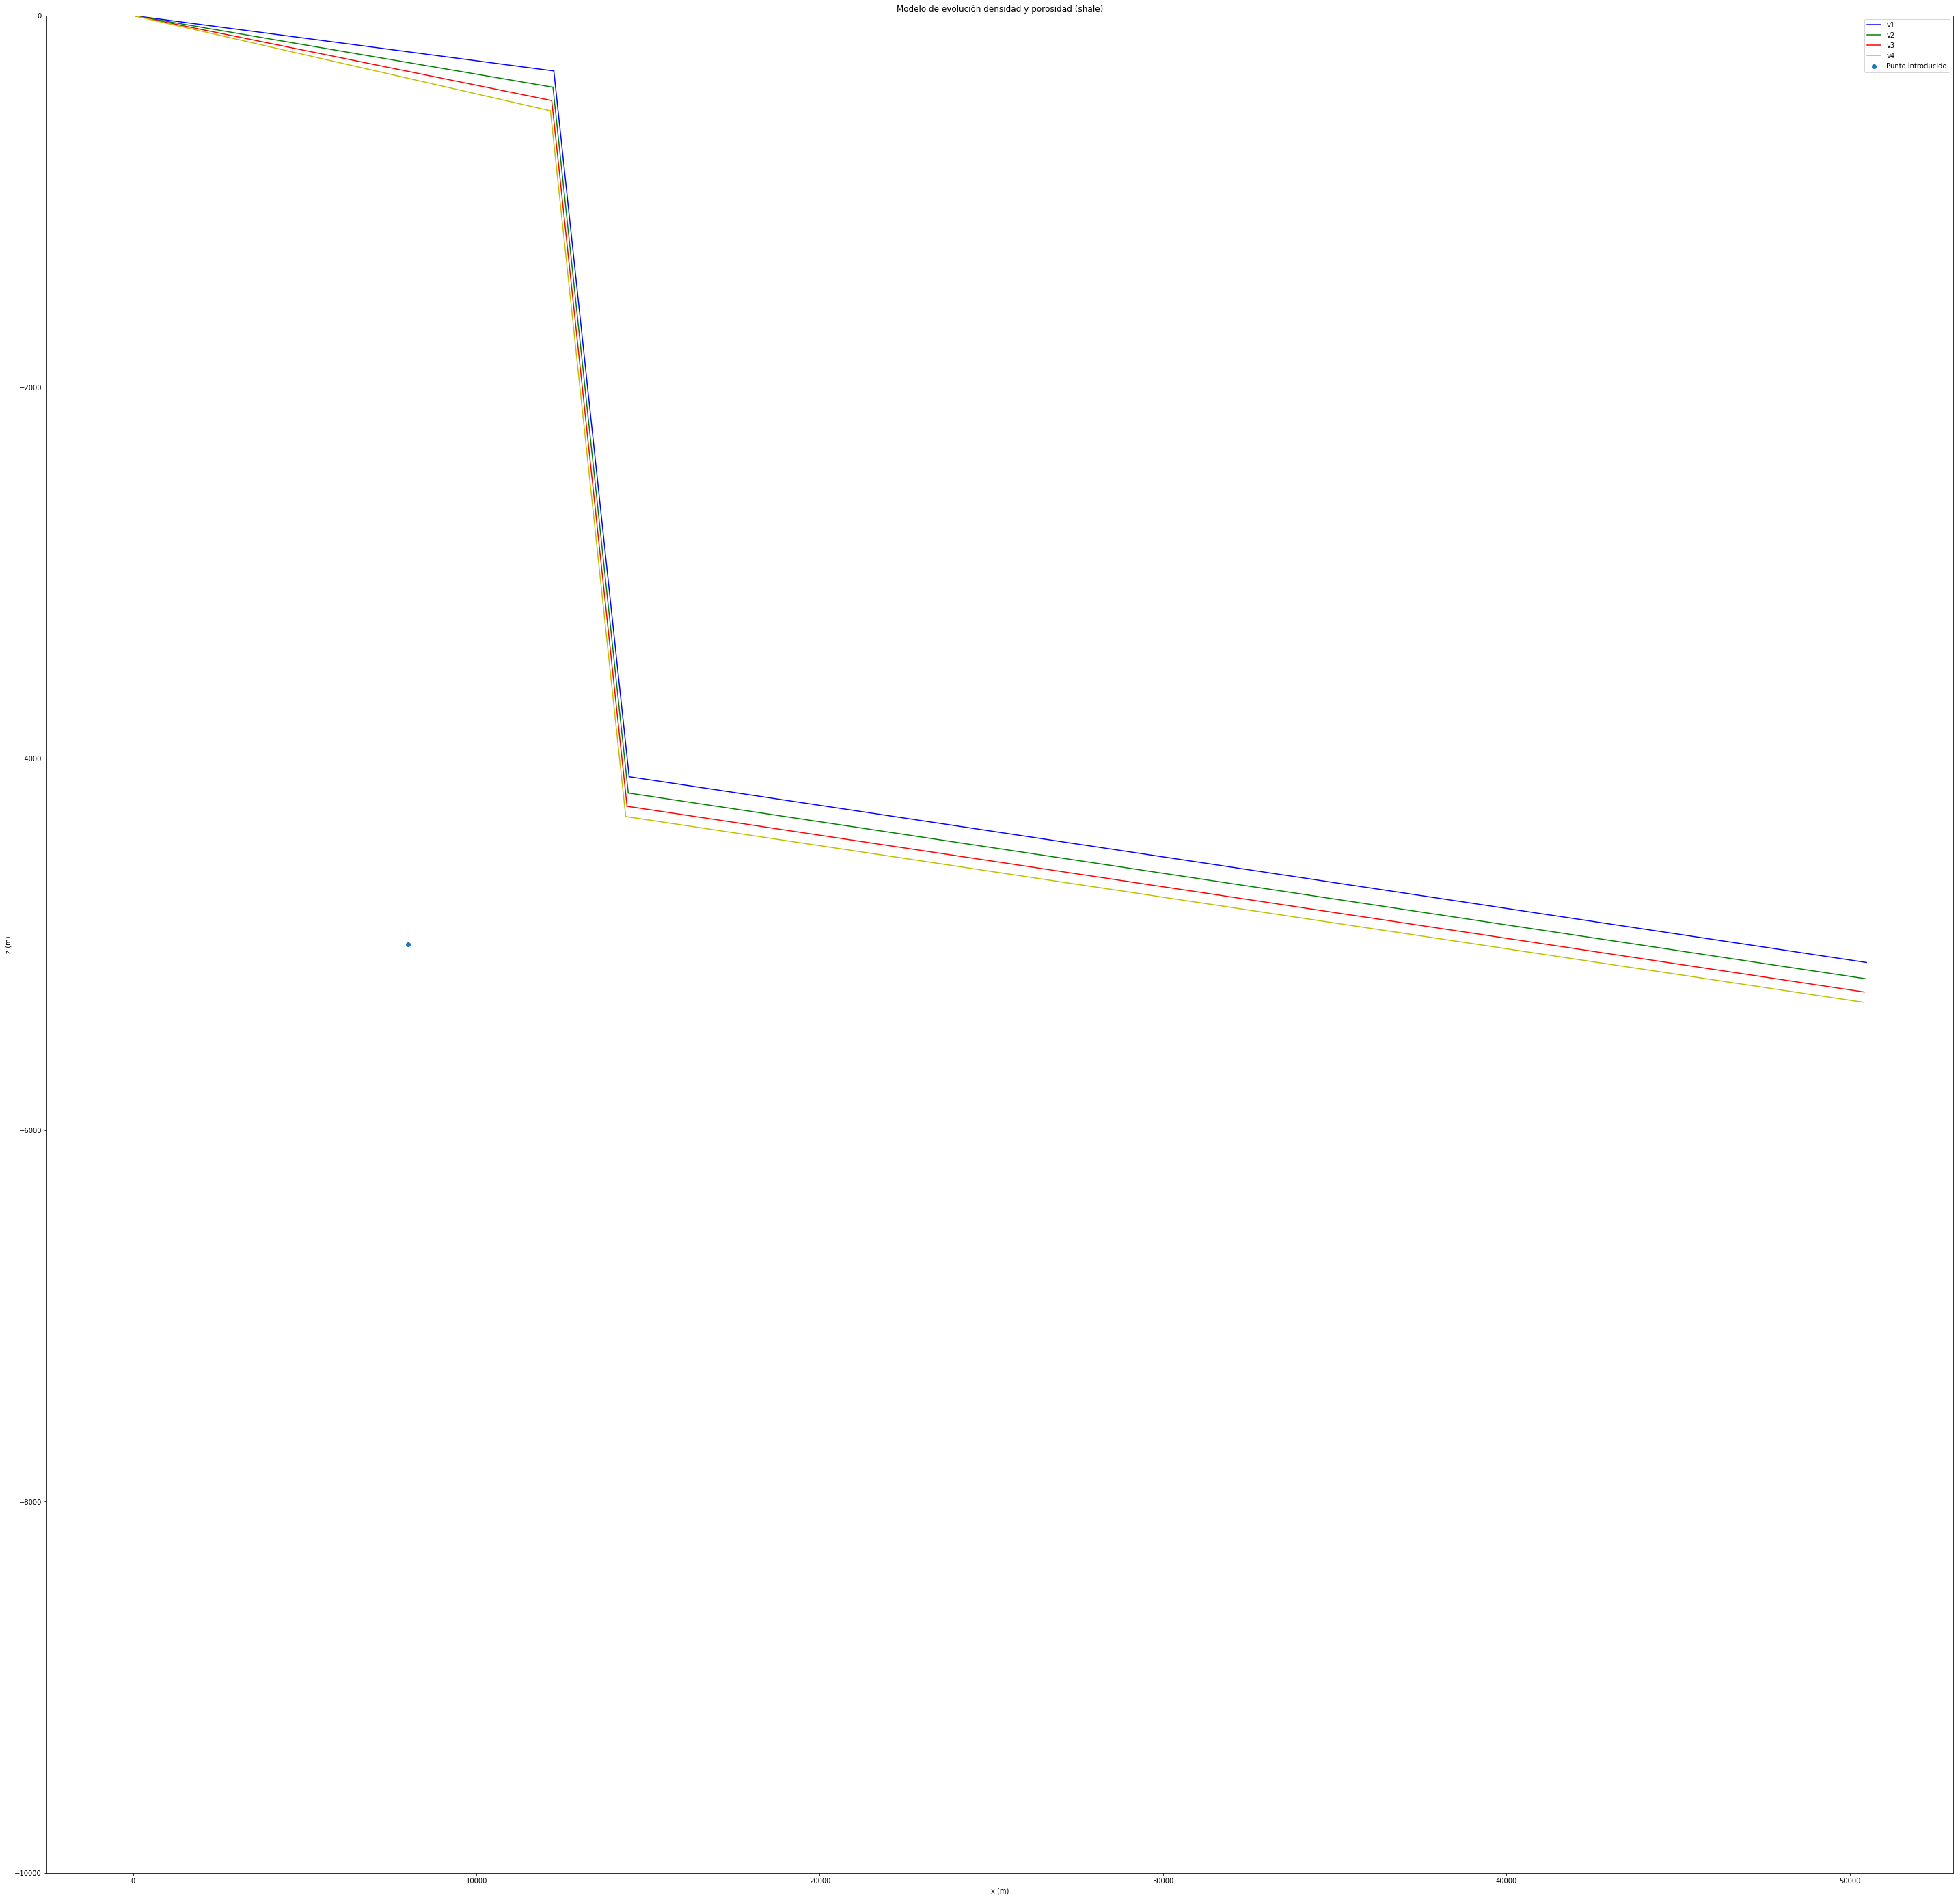

In [2]:
#en este programa vamos a calcular clinoformas de Sandstones y shales

#import dependencies
import numpy as np
import matplotlib.pyplot as plt


#declaramos variables globales (materiales, profundidad)
print("Indique el material del que desea obtener densidad ('shale', 'sandstone'): ")
material = input()


print('Introduzca cociente de velocidades, son 4: ')
v1 = float(input()) #velocidad1
v2 = float(input()) #velocidad2
v3 = float(input()) #velocidad3
v4 = float(input()) #velocidad4

#ángulo
alfa1 = np.arctan(v1) #ángulo del cociente de velocidades
alfa2 = np.arctan(v2)
alfa3 = np.arctan(v3)
alfa4 = np.arctan(v4)

print(' ')
#aca introducimos el punto donde deseamos obtener los resultados
print('Introduzca la profundidad en metros (z): ')
z = float(input()) #por ahora es un escalar, luego será un vector para poder graficar
profundidad = np.array([i*100 for i in range(0,1000)])

print('Introduzca la distancia en metros (x): ')
x = float(input()) #distancia longitudinal

print("Todas las variables estan en magnitudes del sistema internacional")
print(" ")

 #corregir
#función graficadora
def grafica(z, x, material):
	plt.figure(figsize = (50,50))

	#plt.plot([0, 11764.7], [0, -200], 'p') #primera recta (un grado de inclinación)
	plt.plot([0, 11764.7 + 500 * np.cos(alfa1)], [0, -200 - 500 * np.sin(alfa1)], 'b', label='v1') #evolución primera recta
	plt.plot([0, 11764.7 + 500 * np.cos(alfa2)], [0, -200 - 500 * np.sin(alfa2)], 'g', label='v2') #evolución primera recta
	plt.plot([0, 11764.7 + 500 * np.cos(alfa3)], [0, -200 - 500 * np.sin(alfa3)], 'r', label='v3') #evolución primera recta
	plt.plot([0, 11764.7 + 500 * np.cos(alfa4)], [0, -200 - 500 * np.sin(alfa4)], 'y', label='v4') #evolución primera recta

	#plt.plot([11764.7, 13958.63], [-200,-4000], 'p') #valores predeterminados, segunda recta (60 grados de inclinación)
	plt.plot([11764.7 + 500 * np.cos(alfa1), 13958.63 + 500 * np.cos(alfa1)], [-200 - 500 * np.sin(alfa1),-4000 - 500 * np.sin(alfa1)], 'b') #evolución segunda recta
	plt.plot([11764.7 + 500 * np.cos(alfa2), 13958.63 + 500 * np.cos(alfa2)], [-200 - 500 * np.sin(alfa2),-4000 - 500 * np.sin(alfa2)], 'g') #evolución segunda recta
	plt.plot([11764.7 + 500 * np.cos(alfa3), 13958.63 + 500 * np.cos(alfa3)], [-200 - 500 * np.sin(alfa3),-4000 - 500 * np.sin(alfa3)], 'r') #evolución segunda recta
	plt.plot([11764.7 + 500 * np.cos(alfa4), 13958.63 + 500 * np.cos(alfa4)], [-200 - 500 * np.sin(alfa4),-4000 - 500 * np.sin(alfa4)], 'y') #evolución segunda recta

	#plt.plot([13958.63, 50000], [-4000, -5000], 'p') #tercera recta
	plt.plot([13958.63 + 500 * np.cos(alfa1), 50000 + 500 * np.cos(alfa1)], [-4000 - 500 * np.sin(alfa1), -5000 - 500 * np.sin(alfa1)], 'b') #evolución tercera recta
	plt.plot([13958.63 + 500 * np.cos(alfa2), 50000 + 500 * np.cos(alfa2)], [-4000 - 500 * np.sin(alfa2), -5000 - 500 * np.sin(alfa2)], 'g') #evolución tercera recta
	plt.plot([13958.63 + 500 * np.cos(alfa3), 50000 + 500 * np.cos(alfa3)], [-4000 - 500 * np.sin(alfa3), -5000 - 500 * np.sin(alfa3)], 'r') #evolución tercera recta
	plt.plot([13958.63 + 500 * np.cos(alfa4), 50000 + 500 * np.cos(alfa4)], [-4000 - 500 * np.sin(alfa4), -5000 - 500 * np.sin(alfa4)], 'y') #evolución tercera recta

	plt.scatter(x,-z, label = 'Punto introducido') #grafico el punto

	plt.ylim(-10000.0, 0)


	plt.title('Modelo de evolución densidad y porosidad ({})'.format(material))
	plt.legend(loc='upper right')
	plt.xlabel('x (m)')
	plt.ylabel('z (m)')
	plt.show()

#función que me devuelve el valor de la densidad, porosidad, distancia longitudinal (x), profundidad (entre otras por determinar)
def formula(material, z, x, profundidad):
	
	#creo las variables
	porosidad = np.zeros(1000)
	rho_water = 1040.0 #en kg/m3
	rho = np.zeros(1000)
	#profundidad = np.zeros(1000) #vector para graficar la profundidad frente a la densidad

	#si el material es 'shale' calcula la porosidad y densidad de una manera, si es 'sandstone' calculala de otra
	if material == 'shale':
		#acá también graficamos la densidad frente a la profundidad
		porosity = 0.63 * np.exp(-0.51 * z / 1000)
		densidad = porosity * rho_water + (1.0 - porosity) * 2720.0
		for i in range(profundidad.size):
			porosidad[i] = 0.63 * np.exp(-0.51 * profundidad[i] / 1000)
			rho[i] = porosidad[i] * rho_water + (1.0 - porosidad[i]) * 2720.0
	elif material == 'sandstone': 
		#acá también graficamos la densidad frente a la profundidad
		porosity = 0.49 * np.exp(-0.27 * z / 1000)
		densidad = porosity * rho_water + (1.0 - porosity) * 2650.0 
		for i in range(profundidad.size):
			porosidad[i] = 0.49 * np.exp(-0.27 * profundidad[i] / 1000)
			rho[i] = porosidad[i] * rho_water + (1.0 - porosidad[i]) * 2650.0 
	

	plt.plot(profundidad, rho)
	plt.scatter(z, densidad, label = 'Punto introducido')
	plt.title('Densidad de {}'.format(material))
	plt.xlabel('Profundidad (m)')
	plt.ylabel('Densidad (Kg/m^3)')
	plt.legend()
	plt.show()

	print("densidad = {}, porosidad = {}, longitud = {}, profundidad = {}, material: {}".format(densidad, porosity, x, z, material))
	return rho, material, z


formula(material, z, x, profundidad)
grafica(z, x, material)